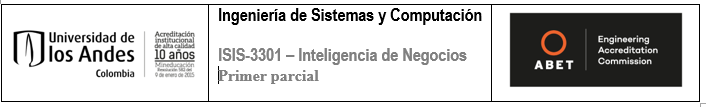

## Código de honor

“Al entregar la solución de este parcial, yo, <span style="color:red"> MARIANA ORTEGA RAMÍREZ</span> con código <span style="color:red">202211233</span> me comprometo a no conversar durante el desarrollo de este examen con ninguna persona que no sea el profesor del curso, sobre aspectos relacionados con el parcial; tampoco utilizaré algún medio de comunicación por voz, texto o intercambio de archivos, para consultar o compartir con otros, información sobre el tema del parcial. Ni usaré alguna IA para resolver las preguntas del parcial. Soy consciente y acepto las consecuencias que acarreará para mi desempeño académico cometer fraude en este parcial”.
Soy consciente y acepto las consecuencias que acarreará para mi desempeño académico cometer fraude en este parcial”.

# Etapa 1

## 1. Entendimiento del negocio y enfoque analítico

### 1.1 Objetivo de negocio
En este proyecto nos enfocamos en la Clínica de los Alpes, donde buscamos mejorar la gestión y atención de pacientes con diabetes, especialmente aquellos con altas tasas de readmisión. Las readmisiones frecuentes generan costos adicionales y afectan la calidad del tratamiento. Creemos que el uso de aprendizaje automático nos permitirá predecir qué pacientes tienen mayor riesgo de ser readmitidos y tomar medidas preventivas a tiempo.

Nuestra meta es optimizar la asignación de recursos médicos, reducir la carga en el personal de salud y mejorar los tratamientos. Con esto, podremos implementar estrategias más eficientes basadas en datos, evitando tomar decisiones generales que no siempre resultan efectivas para todos los pacientes.

### 1.2 Enfoque analítico
Para abordar este problema, utilizaremos un enfoque predictivo basado en aprendizaje supervisado. La tarea principal es clasificación, donde nuestro modelo determinará si un paciente será readmitido en los próximos 30 días.

Hemos decidido evaluar dos algoritmos candidatos:
- **Regresión Logística**, debido a su interpretabilidad y eficiencia en problemas de clasificación binaria.
- **Árboles de Decisión**, por su capacidad de capturar relaciones complejas entre variables sin necesidad de normalización.

Para medir el rendimiento de los modelos, utilizaremos métricas como precisión, recall y F1-score, además de la matriz de confusión. Nos enfocaremos en minimizar los falsos negativos, ya que identificar correctamente a los pacientes con alto riesgo de readmisión es clave para mejorar la calidad del servicio en la clínica.


## 2. Análisis de los datos (20%)

En esta sección, realizaremos la exploración inicial de los datos utilizando la metodología **CRISP-ML**. Nos enfocaremos en entender la estructura del dataset, detectar valores nulos, identificar valores duplicados y analizar la distribución de las variables.

### 2.1 Exploración inicial de los datos
Para comenzar, cargamos los datos y mostramos sus primeras filas. Esto nos permitirá identificar rápidamente su estructura y tipos de datos.

### 2.2 Perfilamiento de los datos
El perfilamiento de datos consiste en revisar aspectos clave como:
- Cantidad de registros y columnas.
- Tipos de datos de cada variable.
- Existencia de valores nulos y duplicados.
- Distribución de valores en las variables.

### 2.3 Evaluación de la calidad de los datos
En este apartado analizamos la presencia de:
- Valores atípicos o inconsistentes.
- Distribuciones de datos sesgadas.
- Problemas de codificación en variables categóricas.

Se utilizarán estadísticas descriptivas y visualizaciones para evaluar la calidad de los datos.

Primeras 5 filas del dataset:


,race,num_lab_procedures,num_medications,age,gender,time_in_hospital,number_diagnoses,num_procedures,admission_source_id,admission_type_id,discharge_disposition_id,insulin,diabetesMed,change,number_inpatient,number_emergency,readmitted
0,Caucasian,88,32,5,F,9,9,0,1,1,1,Yes,Yes,Yes,0,0,Yes
1,Caucasian,43,19,6,F,4,8,1,1,2,1,Yes,Yes,Yes,0,0,No
2,Caucasian,24,8,5,M,4,5,0,17,2,1,No,No,No,0,0,No
3,Caucasian,4,8,6,F,1,8,0,7,1,1,No,No,No,0,0,Yes
4,AfricanAmerican,46,16,7,M,4,6,0,7,1,1,No,Yes,Yes,0,0,Yes



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      2000 non-null   object
 1   num_lab_procedures        2000 non-null   int64 
 2   num_medications           2000 non-null   int64 
 3   age                       2000 non-null   int64 
 4   gender                    2000 non-null   object
 5   time_in_hospital          2000 non-null   int64 
 6   number_diagnoses          2000 non-null   int64 
 7   num_procedures            2000 non-null   int64 
 8   admission_source_id       2000 non-null   int64 
 9   admission_type_id         2000 non-null   int64 
 10  discharge_disposition_id  2000 non-null   int64 
 11  insulin                   2000 non-null   object
 12  diabetesMed               2000 non-null   object
 13  change                    2000 non-null   ob

,num_lab_procedures,num_medications,age,time_in_hospital,number_diagnoses,num_procedures,admission_source_id,admission_type_id,discharge_disposition_id,number_inpatient,number_emergency
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,43.098500,15.764000,7.080500,4.357000,7.300000,1.477000,5.639500,2.135500,3.473000,0.159000,0.089500
std,20.525897,8.246594,1.580908,3.009166,1.903894,1.766644,4.222138,1.541534,5.141059,0.522356,0.355743
min,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,30.000000,10.000000,6.000000,2.000000,6.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,44.000000,14.000000,7.000000,4.000000,8.000000,1.000000,7.000000,1.000000,1.000000,0.000000,0.000000
75%,58.000000,20.000000,8.000000,6.000000,9.000000,2.000000,7.000000,3.000000,3.000000,0.000000,0.000000
max,108.000000,65.000000,10.000000,14.000000,16.000000,6.000000,20.000000,8.000000,28.000000,6.000000,4.000000



Valores nulos en cada columna:


race                        0
num_lab_procedures          0
num_medications             0
age                         0
gender                      0
time_in_hospital            0
number_diagnoses            0
num_procedures              0
admission_source_id         0
admission_type_id           0
discharge_disposition_id    0
insulin                     0
diabetesMed                 0
change                      0
number_inpatient            0
number_emergency            0
readmitted                  0
dtype: int64


Cantidad de filas duplicadas: 25

Distribución de la variable gender:


gender
F    1042
M     958
Name: count, dtype: int64


Distribución de la variable readmitted:


readmitted
No     1192
Yes     808
Name: count, dtype: int64


Distribución de la variable race:


race
Caucasian          1475
AfricanAmerican     379
Other                97
Hispanic             36
Asian                13
Name: count, dtype: int64


Distribución de la variable admission_type_id:


admission_type_id
1    1010
3     384
2     361
6     135
5     101
8       9
Name: count, dtype: int64

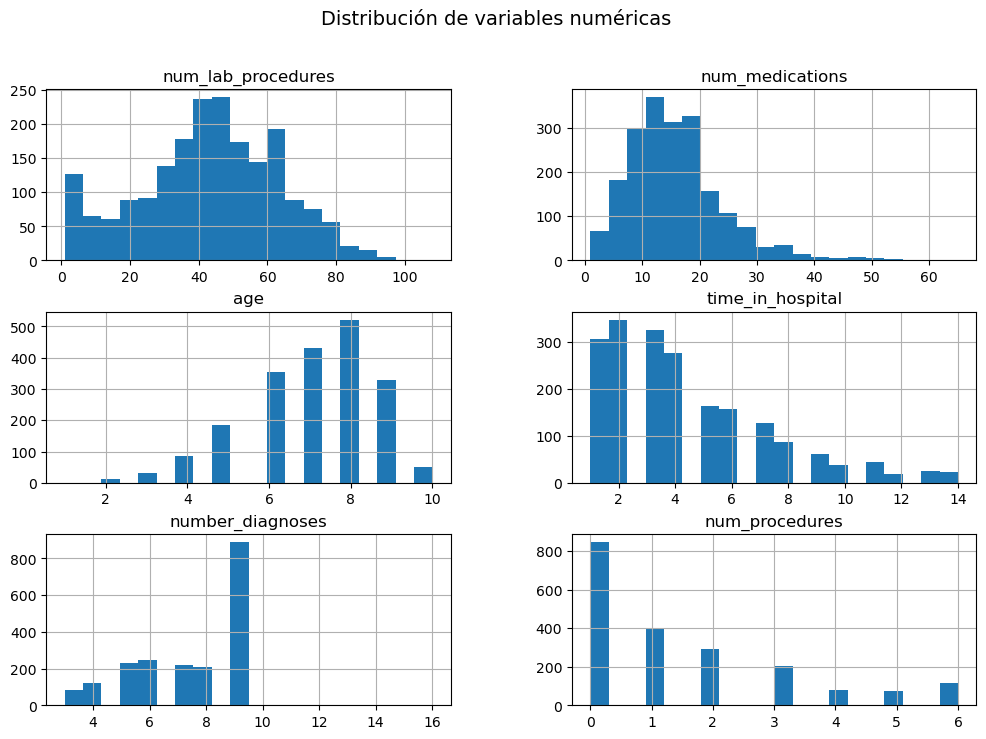

In [12]:
# Importamos librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos los datos
df = pd.read_excel("diabetic_data.xlsx")

# Exploración inicial
print("Primeras 5 filas del dataset:")
display(df.head())

# Información general del dataset
print("\nInformación general del dataset:")
df.info()

# Resumen estadístico de las variables numéricas
print("\nResumen estadístico:")
display(df.describe())

# Cantidad de valores nulos por columna
print("\nValores nulos en cada columna:")
display(df.isnull().sum())

# Cantidad de valores duplicados
print(f"\nCantidad de filas duplicadas: {df.duplicated().sum()}")

# Distribución de valores en las variables categóricas principales
categorical_cols = ['gender', 'readmitted', 'race', 'admission_type_id']
for col in categorical_cols:
    print(f"\nDistribución de la variable {col}:")
    display(df[col].value_counts())

# Visualización de la distribución de variables numéricas
num_cols = ['num_lab_procedures', 'num_medications', 'age', 'time_in_hospital', 'number_diagnoses', 'num_procedures']
df[num_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Distribución de variables numéricas", fontsize=14)
plt.show()



## 3. Transformación y preparación de los datos (20%)

En esta sección, realizaremos la limpieza y transformación de los datos para que sean adecuados para el modelo de Machine Learning.

### 3.1 Identificación y tratamiento de valores nulos y duplicados
- Se verificó previamente que no existen valores nulos en el dataset.
- Se eliminarán las **25 filas duplicadas** para evitar sesgo en el modelo.

### 3.2 Codificación de variables categóricas
Las siguientes variables categóricas deben ser transformadas en valores numéricos:
- **`gender`**: Convertiremos "M" y "F" en valores binarios.
- **`readmitted`**: Convertiremos "No" en 0 y "Yes" en 1 (variable objetivo).
- **`race`**, **`insulin`**, **`diabetesMed`**, **`change`**: Se codificarán con One-Hot Encoding.

### 3.3 Selección de variables relevantes para el modelo
Se seleccionarán las variables que aporten información significativa para la predicción de reingresos. Se excluyen variables irrelevantes o que podrían causar sesgo.

### 3.4 Aplicación de normalización/escalado si es necesario
Para mejorar el rendimiento del modelo, aplicaremos **Min-Max Scaling** a las variables numéricas con valores muy dispersos.

### 3.5 Resultados obtenidos después de la transformación
Se mostrará un resumen del dataset final luego de las transformaciones.


In [13]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# 3.1 Eliminación de duplicados
df = df.drop_duplicates()
print(f"Número de filas después de eliminar duplicados: {df.shape[0]}")

# 3.2 Codificación de variables categóricas
# Convertir 'gender' en valores binarios (0: Female, 1: Male)
df['gender'] = df['gender'].map({'F': 0, 'M': 1})

# Convertir 'readmitted' en variable binaria (0: No readmitido, 1: Readmitido)
df['readmitted'] = df['readmitted'].map({'No': 0, 'Yes': 1})

# One-Hot Encoding para variables categóricas con múltiples valores
categorical_cols = ['race', 'insulin', 'diabetesMed', 'change']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Variables categóricas codificadas.")

# 3.3 Selección de variables relevantes
selected_features = [
    'num_lab_procedures', 'num_medications', 'age', 'time_in_hospital', 
    'number_diagnoses', 'num_procedures', 'admission_source_id', 
    'admission_type_id', 'discharge_disposition_id', 'gender', 'readmitted'
]

df = df[selected_features]

# 3.4 Aplicación de normalización (Min-Max Scaling) a las variables numéricas
scaler = MinMaxScaler()
numerical_cols = ['num_lab_procedures', 'num_medications', 'age', 
                  'time_in_hospital', 'number_diagnoses', 'num_procedures']

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Normalización aplicada a variables numéricas.")

# 3.5 Resultados después de la transformación
print("\nResumen del dataset después de las transformaciones:")
display(df.head())


Número de filas después de eliminar duplicados: 1975
Variables categóricas codificadas.
Normalización aplicada a variables numéricas.

Resumen del dataset después de las transformaciones:


,num_lab_procedures,num_medications,age,time_in_hospital,number_diagnoses,num_procedures,admission_source_id,admission_type_id,discharge_disposition_id,gender,readmitted
0,0.813084,0.484375,0.444444,0.615385,0.461538,0.000000,1,1,1,0,1
1,0.392523,0.281250,0.555556,0.230769,0.384615,0.166667,1,2,1,0,0
2,0.214953,0.109375,0.444444,0.230769,0.153846,0.000000,17,2,1,1,0
3,0.028037,0.109375,0.555556,0.000000,0.384615,0.000000,7,1,1,0,1
4,0.420561,0.234375,0.666667,0.230769,0.230769,0.000000,7,1,1,1,1


## Respuestas a las preguntas del parcial
<span style="color:blue">1. PREGUNTA 1</span>
RTA://

<span style="color:blue">2. PREGUNTA 2</span>
RTA://

<span style="color:blue">3. PREGUNTA 3</span>
RTA://

<span style="color:blue">4. PREGUNTA 4</span>
RTA://

## Anexo Notebook ejecutado